### <em>PROBLEM STATMENT Passenger Aircraft crash data<em/>
"The dataset used in this project contains data from Jan 1918 to Dec 2022 information about airplane crashes, including details such as Operator, Aircraft, Survivors, fatalities, and Crash causes. to get know all specific insites about Crashes it will helpful to Aviation Companies to reduce this types of Accidents." will reduce the fatalities.

## Importing Required Labs

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Data importing from file

In [3]:
plane_d = pd.read_csv('Plane_Crashes1.csv')
plane_d.head()

,Date,Aircraft,Operator,Flight type,Survivors,Crash site,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Crash cause
0,02-05-1918,De Havilland DH.4,United States Signal Corps - USSC,Test,No,Airport (less than 10 km from airport),United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,Technical failure
1,08-06-1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,Test,Yes,Airport (less than 10 km from airport),United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,Technical failure
2,11-06-1918,Avro 504,Royal Air Force - RAF,Training,Yes,"Plain, Valley",Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,Unknown
3,19-06-1918,De Havilland DH.4,United States Signal Corps - USSC,Military,No,Airport (less than 10 km from airport),United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,Technical failure
4,24-06-1918,Breguet 14,French Air Force - Armée de l'Air,Military,Yes,NaN,France,Europe,NaN,0.0,NaN,0.0,0.0,0,Unknown


- making a copy of data

In [4]:
new_d = plane_d.copy()

## 2. Data analyzing. EDA

- <b>Data frame features and checking shape of Data Frame<b/>

In [5]:
obs , feat = new_d.shape
print(f'\nThis data set consist of {str(obs)} and {str(feat)} features are present.')
print(f'\n\nFollowing are features :\n')
for i in new_d.columns:
    print(i)


This data set consist of 28536 and 15 features are present.


Following are features :

Date
Aircraft
Operator
Flight type
Survivors
Crash site
Country
Region
Crew on board
Crew fatalities
Pax on board
PAX fatalities
Other fatalities
Total fatalities
Crash cause


In [6]:
new_d.isna().sum()               #finding null values

Date                  0
Aircraft              1
Operator              0
Flight type          57
Survivors             0
Crash site          333
Country               1
Region                1
Crew on board        24
Crew fatalities       1
Pax on board         54
PAX fatalities        1
Other fatalities     10
Total fatalities      0
Crash cause           0
dtype: int64

Nice to see, that there are not so many missing values of variables we are most interested in (Date, Operator, Aboard, Fatalities, ...). Let's move futher and do some manipulations with data.

In [7]:
 a = new_d['Crash site'].fillna('Unknown',inplace=True)     # #filling number of null values present in data set

In [8]:
new_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Aircraft          28535 non-null  object 
 2   Operator          28536 non-null  object 
 3   Flight type       28479 non-null  object 
 4   Survivors         28536 non-null  object 
 5   Crash site        28536 non-null  object 
 6   Country           28535 non-null  object 
 7   Region            28535 non-null  object 
 8   Crew on board     28512 non-null  float64
 9   Crew fatalities   28535 non-null  float64
 10  Pax on board      28482 non-null  float64
 11  PAX fatalities    28535 non-null  float64
 12  Other fatalities  28526 non-null  float64
 13  Total fatalities  28536 non-null  int64  
 14  Crash cause       28536 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 3.3+ MB


In [9]:
new_d.size                       #size of dataframe

428040

In [10]:
new_d['Crash cause'].unique()    #This is unique values present from Crash cause

array(['Technical failure', 'Unknown', 'Weather', 'Human factor',
       'Other causes', 'Terrorism act, Hijacking, Sabotage'], dtype=object)

In [11]:
new_d.describe()

,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


## 3. Data Visualization.

<b>Declearing only year from the feature<b/>

In [12]:
new_d['year'] = pd.DatetimeIndex(new_d['Date']).year
new_d['year']

0        1918
1        1918
2        1918
3        1918
4        1918
         ... 
28531    2022
28532    2022
28533    2022
28534    2022
28535    2022
Name: year, Length: 28536, dtype: int32

- <b>In which period of time, most aircraft crash cases have been found?<b/>

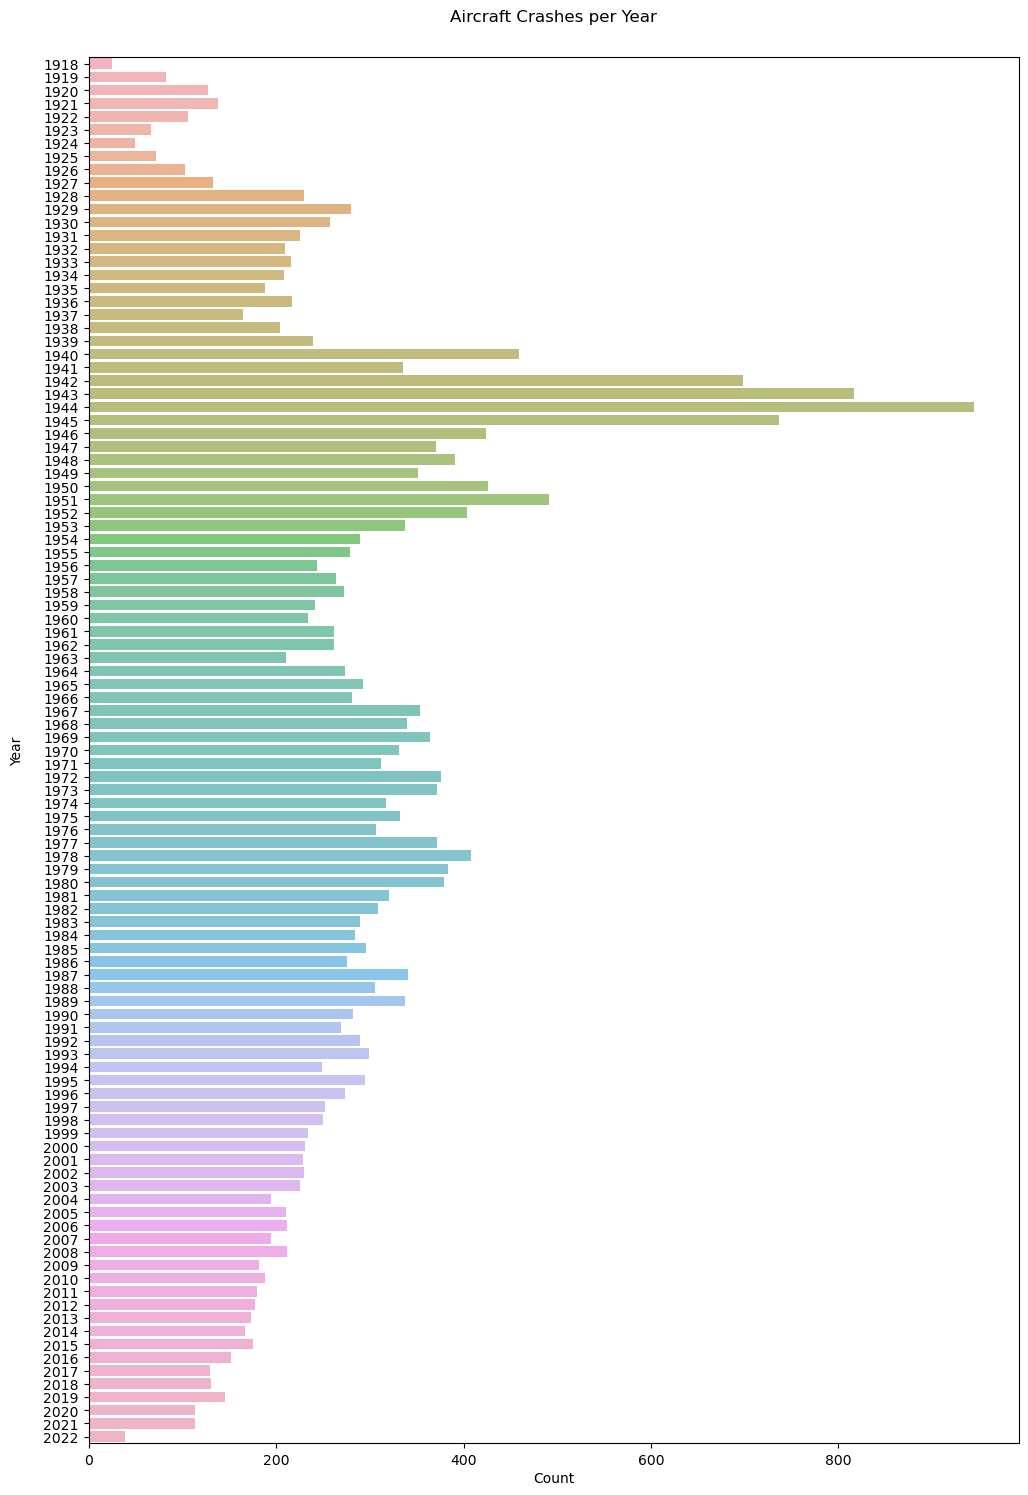

In [13]:
plt.figure(figsize=(12,18))
sns.countplot(y = new_d['year'], data= new_d, alpha = 0.7)
plt.xlabel("Count", labelpad=3)
plt.ylabel("Year", labelpad=14)
plt.title("Aircraft Crashes per Year", y=1.02);
plt.show()
#Obersevation-highest 850+ crashes recorded in 1944.

- <b>What are the reasons of crashes?<b/>

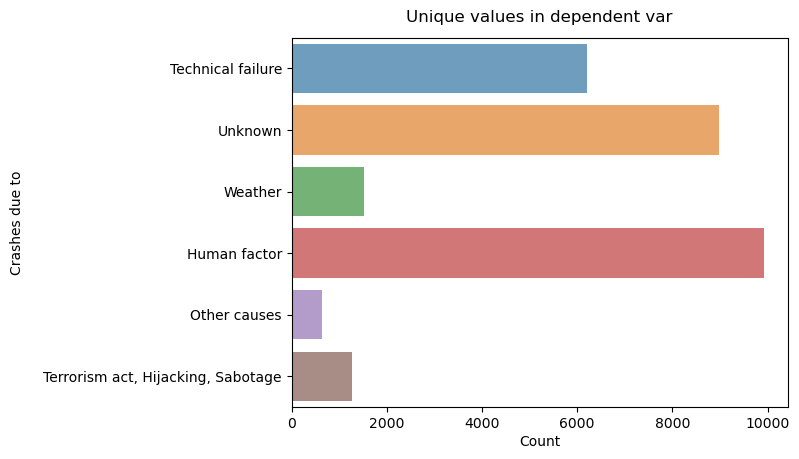

In [15]:
sns.countplot(y = 'Crash cause', data= new_d, alpha = 0.7)
plt.xlabel("Count", labelpad=3)
plt.ylabel("Crashes due to", labelpad=14)
plt.title("Unique values in dependent var", y=1.02);
plt.show()
#Observation-this plot showing number of aircraft crashes caused due to Human factor reasons.

In [16]:
a1 = new_d['Crash cause'].value_counts()
print(a1)                            #taking values count.

Crash cause
Human factor                          9926
Unknown                               8989
Technical failure                     6203
Weather                               1528
Terrorism act, Hijacking, Sabotage    1263
Other causes                           627
Name: count, dtype: int64


In [17]:
def percentage(a,b=28536):           #converting to percentage
    c = 100*a/b
    return c

percentage(a1)

Crash cause
Human factor                          34.784132
Unknown                               31.500561
Technical failure                     21.737454
Weather                                5.354640
Terrorism act, Hijacking, Sabotage     4.425988
Other causes                           2.197225
Name: count, dtype: float64

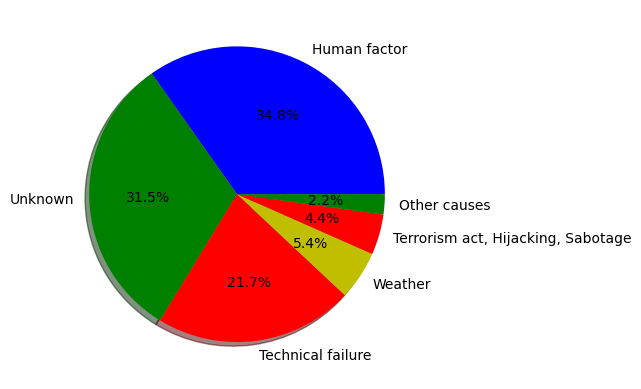

In [18]:
x = [34.784132,31.500561,21.737454,5.354640,4.425988,2.197225]
y = ["Human factor","Unknown","Technical failure","Weather","Terrorism act, Hijacking, Sabotage","Other causes"]
ex = [0.0,0.0,0.0,0.0,0.0,0.0]
c = ["b","g","r","y","r","g"]
plt.pie(x,labels= y,colors = c,autopct = "%0.1f%%",shadow = True)
#plt.legend()
plt.show()
#Observation - Human factor causes over 34.8% of Fight crashes.
# likely crashes caused by weather, Terrorism and other causes are 5.4%, 4.4% and 2.2% Respectively.

- <b>highest crashes recorded by region?<b/>

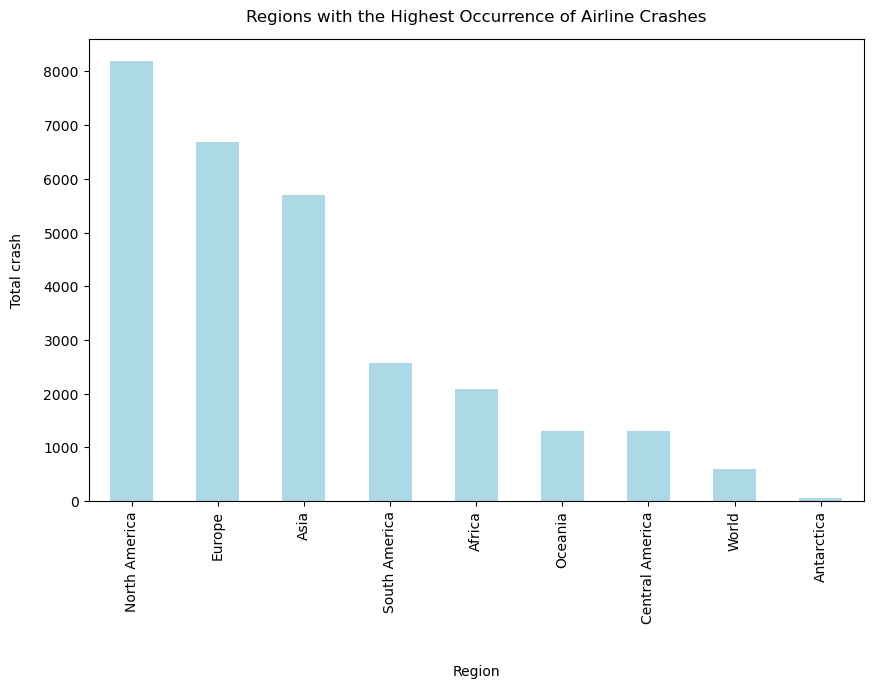

In [19]:
new_d['Region'].value_counts().plot(kind = "bar", figsize=(10, 6), color = "lightblue")
plt.xlabel("Region", labelpad=30)
plt.ylabel("Total crash", labelpad=14)
plt.title("Regions with the Highest Occurrence of Airline Crashes", y=1.02);
#Observation-North America region showes highest number of crashes after than Europe and Asia.

- <b>Count of Accidents by Crash Site<b/>

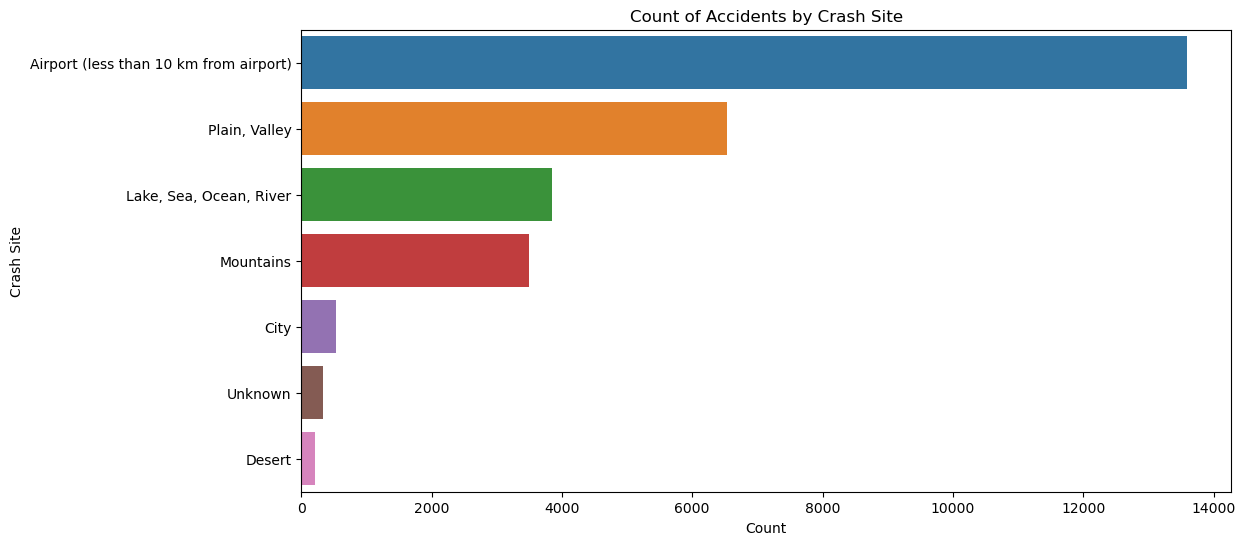

In [20]:
# Plot : Crash site
plt.figure(figsize=(12, 6))
sns.countplot(y='Crash site', data=new_d, order=new_d['Crash site'].value_counts().index)
plt.title('Count of Accidents by Crash Site')
plt.xlabel('Count')
plt.ylabel('Crash Site')
plt.show()
#observation - crashes mostly caused while aircraft taking off or while landing and aslo beacuse of sudden change in weather.
# more than 14000 of airoplanes are crashed near airport (under 10km of radius).

- <b>Accidents by Flight Type<b/>

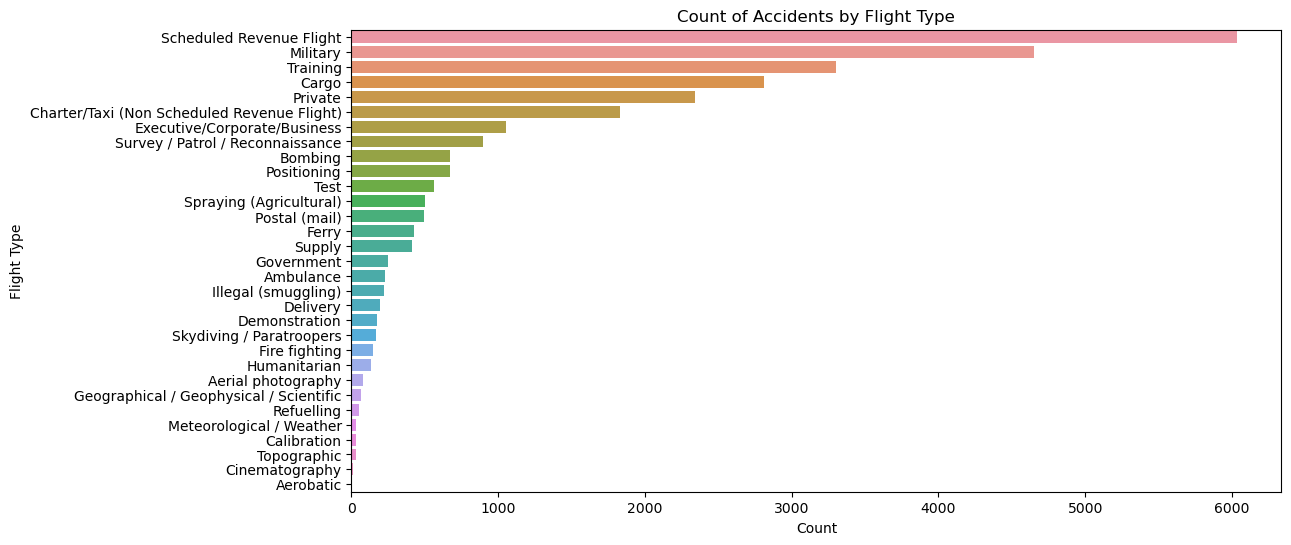

In [21]:
# Plot : Flight type
plt.figure(figsize=(12, 6)) 
sns.countplot(y='Flight type', data=new_d, order=new_d['Flight type'].value_counts().index)
plt.title('Count of Accidents by Flight Type')
plt.xlabel('Count')
plt.ylabel('Flight Type')
plt.show()
#Observations - - Scheduled Revenue Flight have max Accident count.
# other than that Military, Traning and Cargo this fight type also have more accident count.

- <b>How many survivors recorded in plane crashes?<b/>

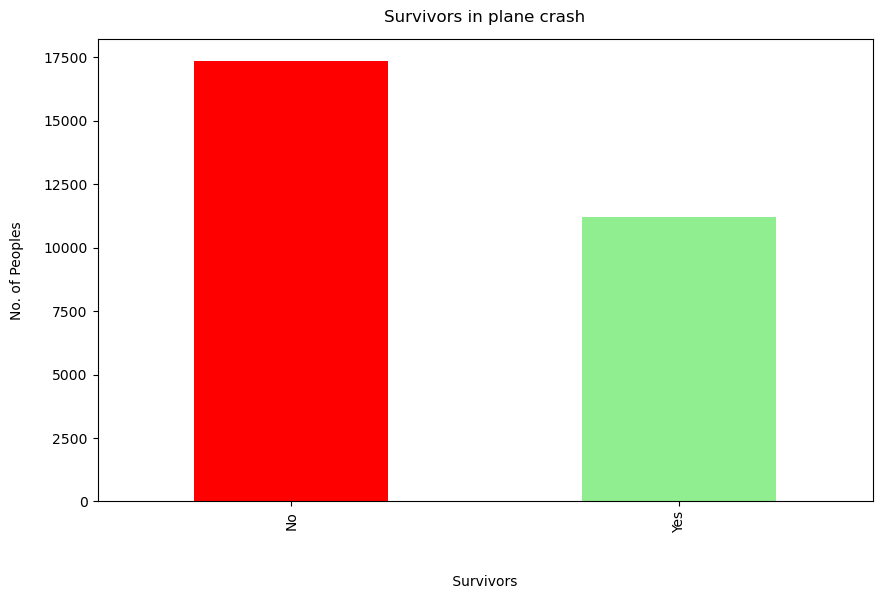

In [22]:
new_d['Survivors'].value_counts().plot(kind = "bar", figsize=(10, 6), color =["red", "lightgreen"])
plt.xlabel(" Survivors ", labelpad=30)
plt.ylabel("No. of Peoples", labelpad=14)
plt.title("Survivors in plane crash", y=1.02);
# if we see from the over all data there are less survivors 10000+ comparitivly 'No' Survivors in past 100 years.

- <b>AirCrash fatalities and survivors over the time<b/>

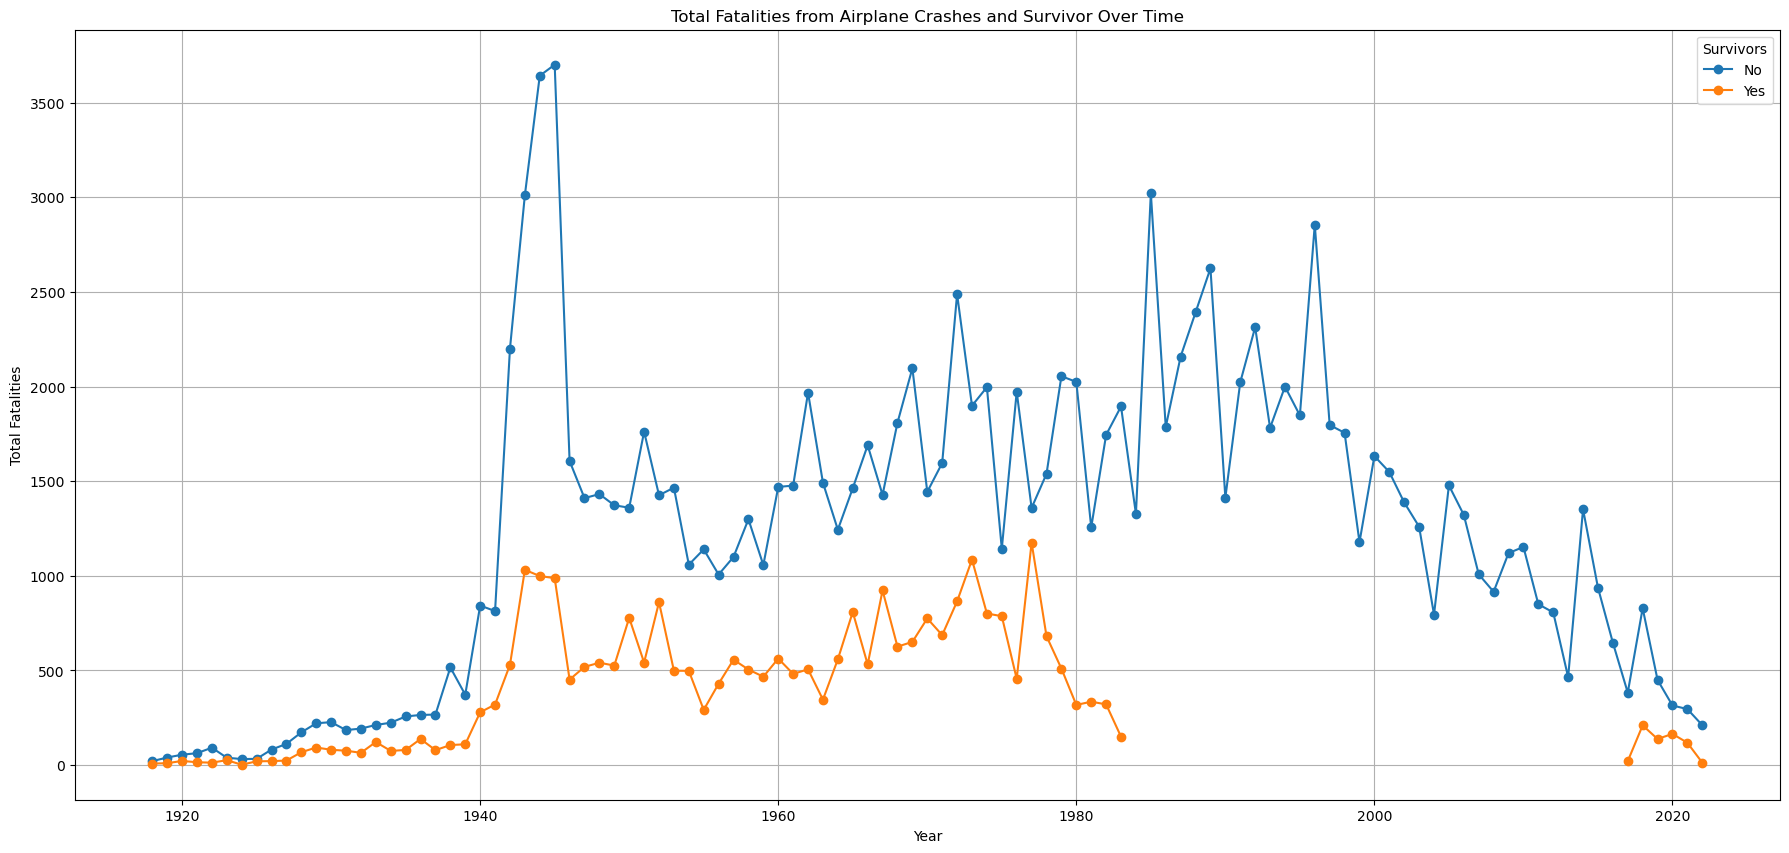

In [23]:
plt.show()
fatalities_by_region = new_d.groupby([new_d['year'], 'Survivors'])['Total fatalities'].sum().unstack()
fatalities_by_region.plot(kind='line', marker='o', figsize=(22, 10))
plt.title('Total Fatalities from Airplane Crashes and Survivor Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.legend(title='Survivors')
plt.grid(True)
plt.show()
#Observation-blue line of fatalities and orange line of survivers in line chart. highest fatalities recorded during 1940 to 1945
#graph showes no survivers from 1982 to 2018. 

# Observations

- As we can see from the past 100 years of data in the year of 1944, 1945, 42 and 43 the highest crashes are the occurred
- The line chart in which the year of 1944 which having the highest airplane crashes has have been found, about 850+ crushes.
- Taking a closer look to what we got found in data. In data most affecting factors are Human factors is 43.8%, Technical failures is 21.7% of the aircraft and the unknown factor this factor causes 31.5% of crashes caused are still not be able to understand what is the main reason so keep it unknown and category.

<b>Highest crushes recorded by the region</b>
- In the region of the North America, Europe and Asia highest occurrences of the airline crashes has been found in at crashes if we check the crashes sites, mostly crashes happen while aircraft taking off and while landing also.
- More than 14000 of the aeroplane are the crust near about airport under the 10 km of the radius.

<b>Survivors</b>
- In the flight accidents VC the scheduled revenue flight and the military these two types of the flight categories having more accidents in count if we check the survivors from this all record near about 17000 peoples are non survivorous and 10000 + survivors are the found in past and radius in the crashed aeroplane there are no such a survivor recorded in 1982 to 2018   as graph shows.

<b>Regions / Area</b>
- So we have to focus on the reasons of the north area Europe and Asia which having more aeroplane crashes in counts and the more causes of more regions of the crash causes are the human factor and technical failures we have to keep in mind that to improve our technical systems regarding the aeroplanes it will be helpful to avoid the crashes has we can see the graph is going down from 2012.